In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0-alpha0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_images)

60000

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Preprocessing the data 

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

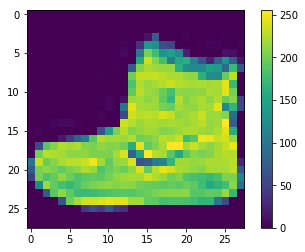

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It is important that the training set and the testing set be preprocessed the same way

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

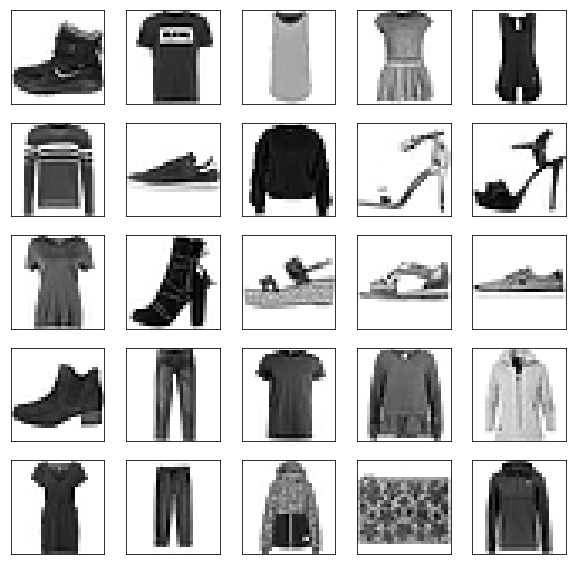

In [10]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color = "white")

plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
%time model.fit(train_images, train_labels, epochs = 1)

60000/60000 [==============================] - 3s 48us/sample - loss: 0.1900 - accuracy: 0.9288
CPU times: user 4.46 s, sys: 508 ms, total: 4.97 s
Wall time: 2.86 s


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy", test_acc)
print("\n Test Loss", round(test_loss, 2))

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3640 - accuracy: 0.8698

Test accuracy 0.8698

 Test Loss 0.36


In [44]:
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([1.2977102e-06, 3.1450373e-08, 1.0373987e-07, 1.1765580e-08,
       4.3303589e-07, 6.2944919e-02, 1.2815302e-06, 7.8134328e-02,
       3.6818860e-06, 8.5891384e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [50]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

    

def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

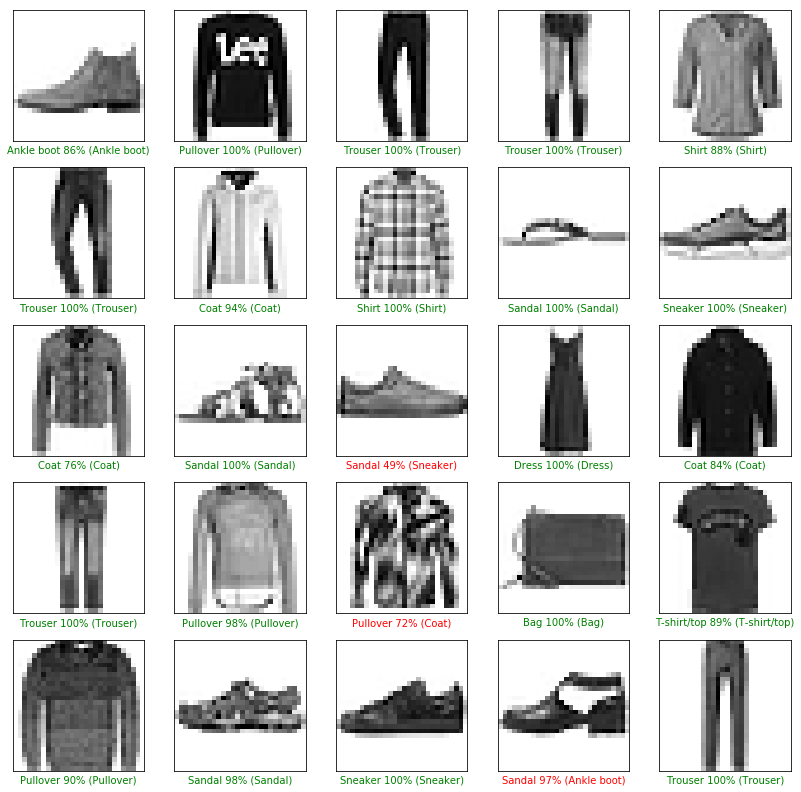

In [74]:
plt.figure(figsize=(14, 14))


for i in range(25):
    plt.subplot(5, 5, i + 1)
    plot_image(i, predictions, test_labels, test_images)

    
plt.show()

In [62]:
img = test_images[0]

print(img.shape)

(28, 28)


In [63]:
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [64]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2977090e-06 3.1450252e-08 1.0373947e-07 1.1765602e-08 4.3303544e-07
  6.2944993e-02 1.2815291e-06 7.8134283e-02 3.6818828e-06 8.5891384e-01]]


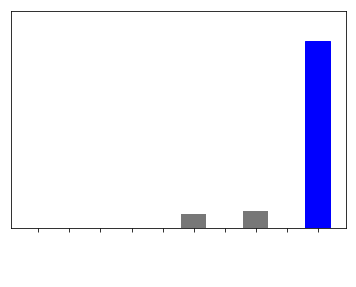

In [68]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation = 45, color = 'white');